# ROY Predictions #

In [1]:
# -*- coding: utf-8 -*-#
"""
Created by MinhKhang Nguyen
August 8 2021 9:54 PM
"""

'\nCreated by MinhKhang Nguyen\nAugust 8 2021 9:54 PM\n'

In [2]:
import pandas as pd 
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#### Importing Data ####

In [4]:
html_url = "https://www.basketball-reference.com/leagues/NBA_2022_rookies-season-stats.html"
rookie_tables = pd.read_html(html_url, header=1)
len(rookie_tables)
rookie = rookie_tables[0]
rookie.head(25)

,Rk,Player,Debut,Age,Yrs,G,MP,FG,FGA,3P,...,TOV,PF,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1
0,1,Santi Aldama,"Oct 27, '21, MEM @ POR",21,1,16,156,24,66,3,...,5,17,58,.364,.111,.583,9.8,3.6,2.6,0.8
1,2,Jose Alvarado,"Nov 3, '21, NOP @ SAC",23,1,8,41,5,13,2,...,1,3,14,.385,.400,.667,5.1,1.8,0.6,1.1
2,3,Joel Ayayi,"Oct 25, '21, WAS @ BRK",21,1,5,13,0,0,0,...,0,0,0,NaN,NaN,NaN,2.6,0.0,0.4,0.6
3,4,Dalano Banton,"Oct 20, '21, TOR vs. WAS",22,1,27,342,44,96,6,...,27,38,112,.458,.300,.750,12.7,4.1,2.3,1.8
4,5,Scottie Barnes,"Oct 20, '21, TOR vs. WAS",20,1,27,973,170,344,21,...,50,77,422,.494,.356,.726,36.0,15.6,8.3,3.4
5,6,Charles Bassey,"Oct 20, '21, PHI @ NOP",21,1,14,128,23,33,0,...,5,22,54,.697,.000,.727,9.1,3.9,3.6,0.3
6,7,Leandro Bolmaro,"Oct 20, '21, MIN vs. HOU",21,1,21,176,8,30,1,...,12,20,25,.267,.100,.889,8.4,1.2,1.6,0.4
7,8,Brandon Boston,"Oct 25, '21, LAC vs. POR",20,1,19,253,38,103,12,...,13,16,108,.369,.300,.870,13.3,5.7,1.7,0.5
8,9,James Bouknight,"Oct 22, '21, CHO @ CLE",21,1,15,125,20,56,10,...,5,9,58,.357,.435,.800,8.3,3.9,1.6,0.6
9,10,Chaundee Brown,"Dec 17, '21, LAL @ MIN",23,1,2,21,1,7,0,...,1,0,2,.143,.000,NaN,10.5,1.0,1.0,0.0


In [5]:
rookie.columns

Index(['Rk', 'Player', 'Debut', 'Age', 'Yrs', 'G', 'MP', 'FG', 'FGA', '3P',
       '3PA', 'FT', 'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'FG%', '3P%', 'FT%', 'MP.1', 'PTS.1', 'TRB.1', 'AST.1'],
      dtype='object')

#### Cleaning DataFrame ####

In [6]:
#renames columns to strings only#
rookie.rename(
    columns={
        '3P': 'TP',
        '3PA': 'TPA',
        'FG%': 'FGP',
        '3P%': 'TPP',
        'FT%': 'FTP',
        'MP.1': 'MPG',
        'PTS.1': 'PPG',
        'TRB.1': 'RPG',
        'AST.1': 'APG',
    }, inplace=True)

#removing duplicate players (stats of players that played on different teams)#
rookie.drop_duplicates(subset=['Player'], keep=False, inplace=True)

#Dropping "Rk" Column#
rookie.drop('Rk', axis=1, inplace=True)

#replacing NaN with 0#
rookie.fillna(0, inplace=True)

rookie.head(25)

,Player,Debut,Age,Yrs,G,MP,FG,FGA,TP,TPA,...,TOV,PF,PTS,FGP,TPP,FTP,MPG,PPG,RPG,APG
0,Santi Aldama,"Oct 27, '21, MEM @ POR",21,1,16,156,24,66,3,27,...,5,17,58,.364,.111,.583,9.8,3.6,2.6,0.8
1,Jose Alvarado,"Nov 3, '21, NOP @ SAC",23,1,8,41,5,13,2,5,...,1,3,14,.385,.400,.667,5.1,1.8,0.6,1.1
2,Joel Ayayi,"Oct 25, '21, WAS @ BRK",21,1,5,13,0,0,0,0,...,0,0,0,0,0,0,2.6,0.0,0.4,0.6
3,Dalano Banton,"Oct 20, '21, TOR vs. WAS",22,1,27,342,44,96,6,20,...,27,38,112,.458,.300,.750,12.7,4.1,2.3,1.8
4,Scottie Barnes,"Oct 20, '21, TOR vs. WAS",20,1,27,973,170,344,21,59,...,50,77,422,.494,.356,.726,36.0,15.6,8.3,3.4
5,Charles Bassey,"Oct 20, '21, PHI @ NOP",21,1,14,128,23,33,0,3,...,5,22,54,.697,.000,.727,9.1,3.9,3.6,0.3
6,Leandro Bolmaro,"Oct 20, '21, MIN vs. HOU",21,1,21,176,8,30,1,10,...,12,20,25,.267,.100,.889,8.4,1.2,1.6,0.4
7,Brandon Boston,"Oct 25, '21, LAC vs. POR",20,1,19,253,38,103,12,40,...,13,16,108,.369,.300,.870,13.3,5.7,1.7,0.5
8,James Bouknight,"Oct 22, '21, CHO @ CLE",21,1,15,125,20,56,10,23,...,5,9,58,.357,.435,.800,8.3,3.9,1.6,0.6
9,Chaundee Brown,"Dec 17, '21, LAL @ MIN",23,1,2,21,1,7,0,3,...,1,0,2,.143,.000,0,10.5,1.0,1.0,0.0


#### Filtering DataFrame ####

In [7]:
rookie[['G','MP','FG','FGA','TP','TPA','FT','FTA','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','FGP','TPP','FTP','MPG','PPG','RPG','APG']] = rookie[['G','MP','FG','FGA','TP','TPA','FT','FTA','ORB','TRB','AST','STL','BLK','TOV','PF','PTS','FGP','TPP','FTP','MPG','PPG','RPG','APG']].apply(pd.to_numeric)

In [8]:
rookie.drop(rookie[rookie['G'] <= 4].index, inplace = True)
rookie.drop(rookie[rookie['TP'] <= 0.1].index, inplace = True)
rookie.drop(rookie[rookie['TPA'] <= 0.1].index, inplace = True)
rookie.drop(rookie[rookie['TPP'] <= 0.1].index, inplace = True)
#rookie.drop(rookie[rookie['PTS'] <= 8].index, inplace = True)#

In [9]:
rookie.drop(['Debut','Yrs','MP','ORB','TRB','AST','PTS'], axis=1, inplace=True)

In [10]:
rookie

,Player,Age,G,FG,FGA,TP,TPA,FT,FTA,STL,BLK,TOV,PF,FGP,TPP,FTP,MPG,PPG,RPG,APG
0,Santi Aldama,21,16,24,66,3,27,7,12,2,3,5,17,0.364,0.111,0.583,9.8,3.6,2.6,0.8
1,Jose Alvarado,23,8,5,13,2,5,2,3,4,0,1,3,0.385,0.400,0.667,5.1,1.8,0.6,1.1
3,Dalano Banton,22,27,44,96,6,20,18,24,11,5,27,38,0.458,0.300,0.750,12.7,4.1,2.3,1.8
4,Scottie Barnes,20,27,170,344,21,59,61,84,29,26,50,77,0.494,0.356,0.726,36.0,15.6,8.3,3.4
7,Brandon Boston,20,19,38,103,12,40,20,23,12,4,13,16,0.369,0.300,0.870,13.3,5.7,1.7,0.5
8,James Bouknight,21,15,20,56,10,23,8,10,1,0,5,9,0.357,0.435,0.800,8.3,3.9,1.6,0.6
11,Jared Butler,21,17,11,32,6,19,4,7,2,6,8,15,0.344,0.316,0.571,4.3,1.9,0.7,0.6
13,Josh Christopher,20,25,55,114,17,42,21,27,15,2,33,27,0.482,0.405,0.778,13.7,5.9,1.6,1.6
16,Cade Cunningham,20,25,142,371,53,169,45,53,35,16,95,69,0.383,0.314,0.849,32.4,15.3,6.2,5.2
17,Ayo Dosunmu,22,25,61,121,17,41,11,19,10,5,20,37,0.504,0.415,0.579,17.9,6.0,2.1,1.2


#### Processing the Data ####

In [11]:
for index, row in rookie.iterrows():
    rookie.loc[index, "ROY Score"] = (row['PPG']+row['RPG']+(row['STL']/row['G'])+row['APG']+(row['BLK']/row['G'])-(row['TOV']/row['G'])-((row['FGA']-row['FG'])/row['G'])) * (row['PPG']+row['RPG']+(row['STL']/row['G'])+(0.5*(row['APG']))+(0.5*(row['BLK']/row['G']))-((row['FGA']-row['FG'])/row['G'])-(row['TOV']/row['G'])-((row['FTA']-row['FT'])/row['G'])-(0.5*(row['FG'])/row['G']))

#NBA Efficiency Metric = (Points)+(Rebounds)+(Steals)+(Assists)+(Blocked Shots)-(Turnovers)-(Missed Shots)#
#Win Score = (Points)+(Rebounds)+(Steals)+(½Assists)+(½Blocked Shots)-(Field Goal Attempts)-(Turnovers)-½(Free Throw Attempts)-½Personal Fouls#
#My equation = (((FG%*3P%*FT%)NBA Efficiency))(Win Score)#

In [12]:
rookie.sort_values(by=['ROY Score'], ascending=False, inplace=True)
roy = rookie.copy()
roy['ROY Score'] = round(roy['ROY Score'],2)
roy['SPG'] = round(roy['STL']/roy['G'],1)
roy['BLKG'] = round(roy['BLK']/roy['G'],1)
roy['TOVG'] = round(roy['TOV']/roy['G'],1)
roy['PFG'] = round(roy['PF']/roy['G'],1)
roy['FG%'] = roy['FGP']*100
roy['3P%'] = roy['TPP']*100
roy['FT%'] = roy['FTP']*100
roy.drop(['FG','FGA','TP','TPA','FT','FTA','STL','BLK','TOV','PF','FGP','TPP','FTP'], axis=1, inplace=True)

roy.rename(
    columns={
        'MPG': 'MP',
        'PPG': 'PTS',
        'RPG': 'REB',
        'APG': 'AST',
        'SPG': 'STL',
        'BLKG': 'BLK',
        'TOVG': 'TOV',
        'PFG': 'PF',
    }, inplace=True)

roy.head(15)

,Player,Age,G,MP,PTS,REB,AST,ROY Score,STL,BLK,TOV,PF,FG%,3P%,FT%
4,Scottie Barnes,20,27,36.0,15.6,8.3,3.4,312.65,1.1,1.0,1.9,2.9,49.4,35.6,72.6
61,Evan Mobley,20,25,33.6,13.8,8.3,2.5,277.68,0.9,1.8,1.6,2.1,47.4,33.3,77.3
92,Franz Wagner,20,33,32.3,15.0,4.7,2.8,161.17,1.1,0.5,1.4,2.4,44.3,35.0,81.1
28,Josh Giddey,19,29,30.1,11.2,7.0,6.0,154.34,1.0,0.6,2.8,1.8,39.7,25.0,65.1
16,Cade Cunningham,20,25,32.4,15.3,6.2,5.2,153.07,1.4,0.6,3.8,2.8,38.3,31.4,84.9
80,Alperen Şengün,19,32,18.8,9.2,4.9,2.8,123.42,1.0,0.8,1.9,3.0,49.5,28.9,71.2
22,David Duke,22,5,27.2,8.6,7.2,1.4,118.44,1.2,0.8,0.6,2.8,36.2,14.3,77.8
19,Chris Duarte,24,31,29.0,13.2,4.1,2.1,96.76,1.0,0.1,1.6,1.7,42.8,34.5,74.0
23,Kessler Edwards,21,5,25.4,8.6,5.0,1.2,80.08,0.6,0.6,1.2,1.2,45.0,41.2,0.0
46,Herbert Jones,23,30,27.3,7.2,3.5,1.8,75.16,1.3,0.9,1.1,3.1,47.3,34.4,76.2


#### Visualization ####

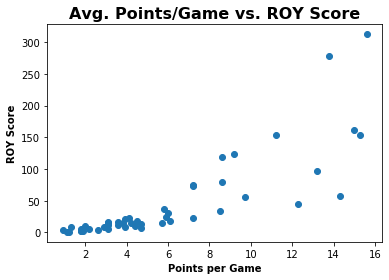

In [13]:
x = roy['PTS']
y = roy['ROY Score']

plt.scatter(x, y)
plt.title('Avg. Points/Game vs. ROY Score', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Points per Game', fontdict={'fontweight':'bold'})
plt.ylabel('ROY Score', fontdict={'fontweight':'bold'})
plt.show()

In [14]:
#plt.savefig('Win Shares vs. MVP Score.png')

In [15]:
roy.set_index(['Player', 'Age', 'G', 'MP','FG%', '3P%', 'FT%', 'TOV', 'PF', 'REB', 'AST', 'STL', 'BLK', 'PTS', 'ROY Score'], inplace=True)
roy = roy.head(15)
roy

,,,,,,,,,,,,,,
Player,Age,G,MP,FG%,3P%,FT%,TOV,PF,REB,AST,STL,BLK,PTS,ROY Score
Scottie Barnes,20,27,36.0,49.4,35.6,72.6,1.9,2.9,8.3,3.4,1.1,1.0,15.6,312.65
Evan Mobley,20,25,33.6,47.4,33.3,77.3,1.6,2.1,8.3,2.5,0.9,1.8,13.8,277.68
Franz Wagner,20,33,32.3,44.3,35.0,81.1,1.4,2.4,4.7,2.8,1.1,0.5,15.0,161.17
Josh Giddey,19,29,30.1,39.7,25.0,65.1,2.8,1.8,7.0,6.0,1.0,0.6,11.2,154.34
Cade Cunningham,20,25,32.4,38.3,31.4,84.9,3.8,2.8,6.2,5.2,1.4,0.6,15.3,153.07
Alperen Şengün,19,32,18.8,49.5,28.9,71.2,1.9,3.0,4.9,2.8,1.0,0.8,9.2,123.42
David Duke,22,5,27.2,36.2,14.3,77.8,0.6,2.8,7.2,1.4,1.2,0.8,8.6,118.44
Chris Duarte,24,31,29.0,42.8,34.5,74.0,1.6,1.7,4.1,2.1,1.0,0.1,13.2,96.76
Kessler Edwards,21,5,25.4,45.0,41.2,0.0,1.2,1.2,5.0,1.2,0.6,0.6,8.6,80.08


#### Exporting ####

###### ROY Table to CSV ######

In [16]:
import datetime

current_date = datetime.datetime.now()
filename = str(current_date.month)+"-"+str(current_date.day)+"-"+str(current_date.year)
output = roy.to_csv(str("MVP " + filename))

In [17]:
roy.to_csv(output)

'Player,Age,G,MP,FG%,3P%,FT%,TOV,PF,REB,AST,STL,BLK,PTS,ROY Score\r\nScottie Barnes,20,27,36.0,49.4,35.6,72.6,1.9,2.9,8.3,3.4,1.1,1.0,15.6,312.65\r\nEvan Mobley,20,25,33.6,47.4,33.300000000000004,77.3,1.6,2.1,8.3,2.5,0.9,1.8,13.8,277.68\r\nFranz Wagner,20,33,32.3,44.3,35.0,81.10000000000001,1.4,2.4,4.7,2.8,1.1,0.5,15.0,161.17\r\nJosh Giddey,19,29,30.1,39.7,25.0,65.10000000000001,2.8,1.8,7.0,6.0,1.0,0.6,11.2,154.34\r\nCade Cunningham,20,25,32.4,38.3,31.4,84.89999999999999,3.8,2.8,6.2,5.2,1.4,0.6,15.3,153.07\r\nAlperen Şengün,19,32,18.8,49.5,28.9,71.2,1.9,3.0,4.9,2.8,1.0,0.8,9.2,123.42\r\nDavid Duke,22,5,27.2,36.199999999999996,14.299999999999999,77.8,0.6,2.8,7.2,1.4,1.2,0.8,8.6,118.44\r\nChris Duarte,24,31,29.0,42.8,34.5,74.0,1.6,1.7,4.1,2.1,1.0,0.1,13.2,96.76\r\nKessler Edwards,21,5,25.4,45.0,41.199999999999996,0.0,1.2,1.2,5.0,1.2,0.6,0.6,8.6,80.08\r\nHerbert Jones,23,30,27.3,47.3,34.4,76.2,1.1,3.1,3.5,1.8,1.3,0.9,7.2,75.16\r\nJeremiah Robinson-Earl,21,31,22.3,41.8,34.0,66.7,0.9,1.5,5.